In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 점 찍어보는거
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [34]:
#리스트로 되어있는 x와 y값을 학습을 위해 넘파이 배열로 바꾸어줌.
#인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함.
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

#학습률 0.03 learning rate
lr = 0.03

#몇 번 반복될지 설정함. 여기선 경사하강법 횟수
epochs = 2001

#경사하강법 시작
for i in range(epochs):
    y_hat = a * x_data +b # y를 구하는 식
    error = y_data - y_hat #오차 구하는 식
    a_diff = -(2/len(x_data) * sum(x_data * (error))) #오차함수를 a로 미분한 값
    b_diff = -(2/len(x_data) * sum(error)) #오차함수를 b로 미분한 값
    ##여기선 Sum이 Sigma와 같은것.
    a = a - lr * a_diff #학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff #학습률을 곱해 기존의 b값을 업데이트
    if i % 100 == 0: #100번 반복될 때마다 현재의 epoch , a, b값을 출력
        print(f'epoch = {i} 기울기 ={a} 절편 ={b}')

#어떻게 optimizing 하냐에 따라서 최적의 학습을 구할수있음.

epoch = 0 기울기 =27.84 절편 =5.43
epoch = 100 기울기 =7.073858435872394 절편 =50.51166161138297
epoch = 200 기울기 =4.095999380762421 절편 =68.28224379060177
epoch = 300 기울기 =2.9756829100119027 절편 =74.96781336233505
epoch = 400 기울기 =2.5542024233262106 절편 =77.48302865233052
epoch = 500 기울기 =2.3956349066513707 절편 =78.42929177728175
epoch = 600 기울기 =2.3359793398132864 절편 =78.78529068727728
epoch = 700 기울기 =2.313535987420573 절편 =78.91922301600925
epoch = 800 기울기 =2.3050924490666174 절편 =78.96961044185792
epoch = 900 기울기 =2.3019158585694823 절편 =78.98856697541248
epoch = 1000 기울기 =2.3007207758016315 절편 =78.99569871827002
epoch = 1100 기울기 =2.300271167070735 절편 =78.99838179089187
epoch = 1200 기울기 =2.3001020172709508 절편 =78.9993912045567
epoch = 1300 기울기 =2.300038380484562 절편 =78.99977096168232
epoch = 1400 기울기 =2.3000144393354365 절편 =78.9999138322214
epoch = 1500 기울기 =2.3000054323026444 절편 =78.99996758234106
epoch = 1600 기울기 =2.300002043716771 절편 =78.99998780397235
epoch = 1700 기울기 =2.3000007688780433 절편 =78

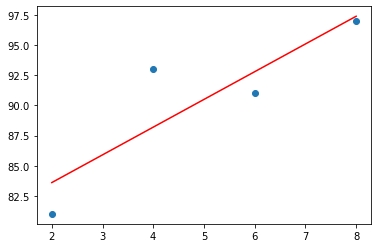

In [39]:
#학습률 0.03에서 반복을 아무리 실행시켜도 기울기와 절편이 2.3 79.0 에서 늘어나지 않음
##별도 테스트로 학습률을 0.01~0.03 그리고 epoch를 2001~50001까지 해보았지만
##기울기 절편은 2.3 79로 동일

y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred),max(y_pred)], c='r')
plt.show()
#y = ax + b
#y = 2.3x + 79
# 공부한 시간 = x , 성적 = y

##오차수정하기 : 경사하강법

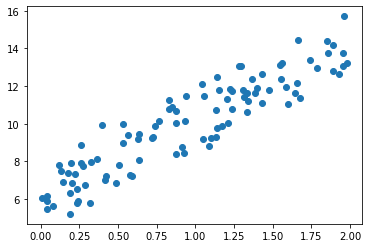

In [44]:
%matplotlib inline

np.random.seed(0)

#Y = 4x + 식을 근사(w1=4, w0=6), random 값은 Noise를 위해 만듬.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

plt.scatter(X ,y)

In [46]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T , diff))
    
    return w1_update, w0_update

In [52]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T , diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T , diff))
print(f'{w1_update.shape, w0_update.shape}')
w1, w0

(100, 1)
((1, 1), (1, 1))


(array([[0.]]), array([[0.]]))

In [54]:
#반복적으로 경사하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X , y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [56]:
##예측 오차 비용을 계산을 수행하는 함수 생서 및 경사 하강법 수행
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X , y , iters=1000)
print("w1:{0:.3f}, w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Grandient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022, w0:6.162
Grandient Descent Total Cost:0.9935
